In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot.metrics as skplt
import matplotlib.pyplot as plt

In [2]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
train_df = pd.read_csv("Data/eng_train_bow.csv")
test_df = pd.read_csv("Data/eng_test_bow.csv")
X_train = train_df.drop(columns=["Y"])
Y_train = train_df["Y"]
X_test = test_df.drop(columns=["Y"])
Y_test = test_df["Y"]

y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(Y_test)
y_train.shape, Y_train.shape, y_test.shape, Y_test.shape

le = LabelEncoder()
Y_train = pd.DataFrame(le.fit_transform(Y_train.values))
Y_test = pd.DataFrame(le.fit_transform(Y_test.values))


In [4]:
Y_train.head()

,0
0,1
1,2
2,1
3,1
4,2


In [5]:
y_train.head()

,CAG,NAG,OAG
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [6]:
clf = SVC(C=1000, gamma=0.0001, kernel='rbf', probability=True)
clf.fit(X_train.values, Y_train.values)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1000, gamma=0.0001, probability=True)

In [7]:
print(f'Train score = {clf.score(X_train.values, Y_train.values)}')
print(f'Test score = {clf.score(X_test.values, Y_test.values)}')

Train score = 0.9241207734931585
Test score = 0.9121372031662269


--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = C = 1000, gamma = 0.0001, kernel = rbf
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1290
           1       0.79      0.99      0.88      1254
           2       1.00      0.88      0.93      1246

    accuracy                           0.91      3790
   macro avg       0.93      0.91      0.91      3790
weighted avg       0.93      0.91      0.91      3790



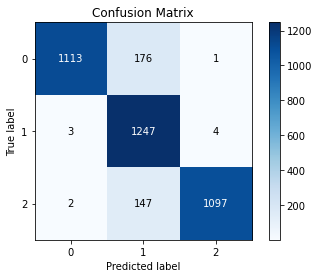

In [8]:
predictions = clf.predict(X_test.values)
predictions_train = clf.predict(X_train.values)

print('--------')
print(skplt.plot_confusion_matrix(Y_test, predictions))
print('Best params = C = {0}, gamma = {1}, kernel = {2}'.format(1000, 0.0001, 'rbf'))
print('----F1 Score, Recall, Precision----')
# print precision, recall, F1-score per each class/tag
print(classification_report(Y_test, predictions))

In [9]:
probs = clf.predict_proba(X_test.values)
roc_auc_score(Y_test.values, probs, multi_class='ovr', average='weighted')

0.9638277349502328

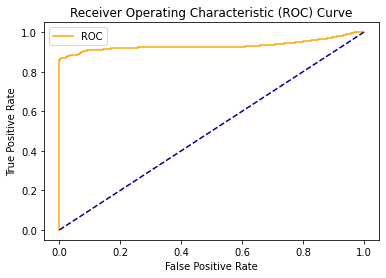

In [10]:
clf0 = SVC(C=1000, gamma=0.0001, kernel='rbf', probability=True)
clf0.fit(X_train.values, y_train.iloc[:, 0].values)
probs0 = clf0.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 0].values, probs0[:, 1])
plot_roc_cur(fper, tper)

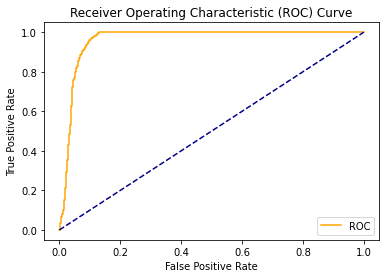

In [11]:
clf1 = SVC(C=1000, gamma=0.0001, kernel='rbf', probability=True)
clf1.fit(X_train.values, y_train.iloc[:, 1].values)
probs1 = clf1.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 1].values, probs1[:, 1])
plot_roc_cur(fper, tper)

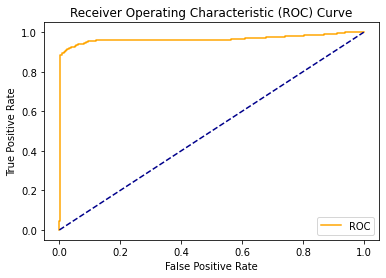

In [12]:
clf2 = SVC(C=1000, gamma=0.0001, kernel='rbf', probability=True)
clf2.fit(X_train.values, y_train.iloc[:, 2].values)
probs2 = clf2.predict_proba(X_test.values)
fper, tper, threshold = roc_curve(y_test.iloc[:, 2].values, probs2[:, 1])
plot_roc_cur(fper, tper)